<a href="https://colab.research.google.com/github/HebaSedik/machine-learning/blob/master/pandas_trash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***dataset***
# https://github.com/elmoallistair/datacamp/blob/master/data-manipulation-with-pandas/datasets/homelessness.csv

In [1]:
import numpy as np
import pandas as pd
import missingno as msno

In [2]:
df_home=pd.read_csv('/content/homelessness.csv')
df_home.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [3]:
df_home['region'].unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Mid-Atlantic'], dtype=object)

In [4]:
df_home['region']=="Mountain"

0     False
1     False
2      True
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
27    False
28     True
29    False
30    False
31     True
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44     True
45    False
46    False
47    False
48    False
49    False
50     True
Name: region, dtype: bool

In [5]:
df_home[df_home['region']=="Mountain"]

,Unnamed: 0,region,state,individuals,family_members,state_pop
2,2,Mountain,Arizona,7259.0,2606.0,7158024
5,5,Mountain,Colorado,7607.0,3250.0,5691287
12,12,Mountain,Idaho,1297.0,715.0,1750536
26,26,Mountain,Montana,983.0,422.0,1060665
28,28,Mountain,Nevada,7058.0,486.0,3027341
31,31,Mountain,New Mexico,1949.0,602.0,2092741
44,44,Mountain,Utah,1904.0,972.0,3153550
50,50,Mountain,Wyoming,434.0,205.0,577601


In [6]:
df_home[df_home['region']=="Mountain"]['state_pop']

2     7158024
5     5691287
12    1750536
26    1060665
28    3027341
31    2092741
44    3153550
50     577601
Name: state_pop, dtype: int64

In [7]:
df_home[df_home['region']=="Mountain"]['state_pop'].mean()

3063968.125

In [8]:
df_home[df_home['region']=="Mountain"]['state_pop'].agg({'min', 'max','mean' })

max     7158024.000
min      577601.000
mean    3063968.125
Name: state_pop, dtype: float64

In [9]:
df_group=df_home.groupby('region')['state_pop'].agg({'min', 'max','mean' })

In [10]:
df_group

,max,min,mean
region,,,
East North Central,12723071,5807406,9.377277e+06
East South Central,6771631,2981020,4.775371e+06
Mid-Atlantic,19530351,8886025,1.373910e+07
Mountain,7158024,577601,3.063968e+06
New England,6882635,624358,2.471554e+06
Pacific,39461588,735139,1.066462e+07
South Atlantic,21244317,701547,7.247736e+06
West North Central,6121623,758080,3.050034e+06
West South Central,28628666,3009733,1.005958e+07


In [11]:

df_group.reset_index()

,region,max,min,mean
0,East North Central,12723071,5807406,9.377277e+06
1,East South Central,6771631,2981020,4.775371e+06
2,Mid-Atlantic,19530351,8886025,1.373910e+07
3,Mountain,7158024,577601,3.063968e+06
4,New England,6882635,624358,2.471554e+06
5,Pacific,39461588,735139,1.066462e+07
6,South Atlantic,21244317,701547,7.247736e+06
7,West North Central,6121623,758080,3.050034e+06
8,West South Central,28628666,3009733,1.005958e+07


In [12]:
df_indexing=df_home.set_index('region')
df_indexing.head()

,Unnamed: 0,state,individuals,family_members,state_pop
region,,,,,
East South Central,0,Alabama,2570.0,864.0,4887681
Pacific,1,Alaska,1434.0,582.0,735139
Mountain,2,Arizona,7259.0,2606.0,7158024
West South Central,3,Arkansas,2280.0,432.0,3009733
Pacific,4,California,109008.0,20964.0,39461588


# ***.loc***

In [13]:
df_home.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [14]:
df_home[['region', 'state']].head()

,region,state
0,East South Central,Alabama
1,Pacific,Alaska
2,Mountain,Arizona
3,West South Central,Arkansas
4,Pacific,California


In [15]:
df_home.loc[:,['region', 'state']].head()

,region,state
0,East South Central,Alabama
1,Pacific,Alaska
2,Mountain,Arizona
3,West South Central,Arkansas
4,Pacific,California


In [16]:
df_home.loc[:,'region':'family_members'].head()

,region,state,individuals,family_members
0,East South Central,Alabama,2570.0,864.0
1,Pacific,Alaska,1434.0,582.0
2,Mountain,Arizona,7259.0,2606.0
3,West South Central,Arkansas,2280.0,432.0
4,Pacific,California,109008.0,20964.0


In [17]:
df_home.loc[:5,:]

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588
5,5,Mountain,Colorado,7607.0,3250.0,5691287


In [18]:
w= np.array([[1,2,5,6],[4,5,6,7],[9,8,3,4]])
w

array([[1, 2, 5, 6],
       [4, 5, 6, 7],
       [9, 8, 3, 4]])

In [19]:
w[:2,]

array([[1, 2, 5, 6],
       [4, 5, 6, 7]])

In [20]:
df_home.loc[3:5,:]

,Unnamed: 0,region,state,individuals,family_members,state_pop
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588
5,5,Mountain,Colorado,7607.0,3250.0,5691287


In [21]:
df_home.head(10)

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588
5,5,Mountain,Colorado,7607.0,3250.0,5691287
6,6,New England,Connecticut,2280.0,1696.0,3571520
7,7,South Atlantic,Delaware,708.0,374.0,965479
8,8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,9,South Atlantic,Florida,21443.0,9587.0,21244317


In [22]:
df_home.tail()

,Unnamed: 0,region,state,individuals,family_members,state_pop
46,46,South Atlantic,Virginia,3928.0,2047.0,8501286
47,47,Pacific,Washington,16424.0,5880.0,7523869
48,48,South Atlantic,West Virginia,1021.0,222.0,1804291
49,49,East North Central,Wisconsin,2740.0,2167.0,5807406
50,50,Mountain,Wyoming,434.0,205.0,577601


# **.iloc**

In [23]:
df_home.iloc[::4, 1:4]

,region,state,individuals
0,East South Central,Alabama,2570.0
4,Pacific,California,109008.0
8,South Atlantic,District of Columbia,3770.0
12,Mountain,Idaho,1297.0
16,West North Central,Kansas,1443.0
20,South Atlantic,Maryland,4914.0
24,East South Central,Mississippi,1024.0
28,Mountain,Nevada,7058.0
32,Mid-Atlantic,New York,39827.0
36,West South Central,Oklahoma,2823.0


In [24]:
import time

In [25]:
s= time.time()
d= df_home.groupby('region')['state_pop'].agg({'min','mean','max','var','std'})
d

,var,std,mean,max,min
region,,,,,
East North Central,9.196039e+12,3.032497e+06,9.377277e+06,12723071,5807406
East South Central,2.438699e+12,1.561633e+06,4.775371e+06,6771631,2981020
Mid-Atlantic,2.898555e+13,5.383823e+06,1.373910e+07,19530351,8886025
Mountain,5.219585e+12,2.284641e+06,3.063968e+06,7158024,577601
New England,5.721938e+12,2.392057e+06,2.471554e+06,6882635,624358
Pacific,2.663005e+14,1.631872e+07,1.066462e+07,39461588,735139
South Atlantic,4.200586e+13,6.481193e+06,7.247736e+06,21244317,701547
West North Central,4.538320e+12,2.130333e+06,3.050034e+06,6121623,758080
West South Central,1.537055e+14,1.239780e+07,1.005958e+07,28628666,3009733


In [26]:
e= time.time()
e-s

0.021828651428222656

In [27]:
df_indexing

,Unnamed: 0,state,individuals,family_members,state_pop
region,,,,,
East South Central,0,Alabama,2570.0,864.0,4887681
Pacific,1,Alaska,1434.0,582.0,735139
Mountain,2,Arizona,7259.0,2606.0,7158024
West South Central,3,Arkansas,2280.0,432.0,3009733
Pacific,4,California,109008.0,20964.0,39461588
Mountain,5,Colorado,7607.0,3250.0,5691287
New England,6,Connecticut,2280.0,1696.0,3571520
South Atlantic,7,Delaware,708.0,374.0,965479
South Atlantic,8,District of Columbia,3770.0,3134.0,701547


In [28]:
df_indexing= df_home.set_index('region')

In [29]:
df_indexing


,Unnamed: 0,state,individuals,family_members,state_pop
region,,,,,
East South Central,0,Alabama,2570.0,864.0,4887681
Pacific,1,Alaska,1434.0,582.0,735139
Mountain,2,Arizona,7259.0,2606.0,7158024
West South Central,3,Arkansas,2280.0,432.0,3009733
Pacific,4,California,109008.0,20964.0,39461588
Mountain,5,Colorado,7607.0,3250.0,5691287
New England,6,Connecticut,2280.0,1696.0,3571520
South Atlantic,7,Delaware,708.0,374.0,965479
South Atlantic,8,District of Columbia,3770.0,3134.0,701547


In [30]:
s= time.time()
qq= df_indexing.groupby('region')['state_pop'].agg({'min','mean','max','var','std'})
e= time.time()
e-s

0.004369497299194336

In [31]:
df_home.loc[:,'region':'family_members'].head()

,region,state,individuals,family_members
0,East South Central,Alabama,2570.0,864.0
1,Pacific,Alaska,1434.0,582.0
2,Mountain,Arizona,7259.0,2606.0
3,West South Central,Arkansas,2280.0,432.0
4,Pacific,California,109008.0,20964.0


In [32]:
df_indexing.sort_index(level='region')

,Unnamed: 0,state,individuals,family_members,state_pop
region,,,,,
East North Central,35,Ohio,6929.0,3320.0,11676341
East North Central,49,Wisconsin,2740.0,2167.0,5807406
East North Central,22,Michigan,5209.0,3142.0,9984072
East North Central,13,Illinois,6752.0,3891.0,12723071
East North Central,14,Indiana,3776.0,1482.0,6695497
East South Central,0,Alabama,2570.0,864.0,4887681
East South Central,42,Tennessee,6139.0,1744.0,6771631
East South Central,24,Mississippi,1024.0,328.0,2981020
East South Central,17,Kentucky,2735.0,953.0,4461153


In [36]:
df_home.pivot_table(index=['region','state'], values='family_members' ,aggfunc=['max','min','mean'])

max            min  \
                                        family_members family_members   
region             state                                                
East North Central Illinois                     3891.0         3891.0   
                   Indiana                      1482.0         1482.0   
                   Michigan                     3142.0         3142.0   
                   Ohio                         3320.0         3320.0   
                   Wisconsin                    2167.0         2167.0   
East South Central Alabama                       864.0          864.0   
                   Kentucky                      953.0          953.0   
                   Mississippi                   328.0          328.0   
                   Tennessee                    1744.0         1744.0   
Mid-Atlantic       New Jersey                   3350.0         3350.0   
                   New York                    52070.0        52070.0   
                   Pennsylvania                 5349.0         5349.0   
Mountain           Arizona                      2606.0         2606.0   
                   Colorado                     3250.0         3250.0   
                   Idaho                         715.0          715.0   
                   Montana                       422.0          422.0   
                   Nevada                        486.0          486.0   
                   New Mexico                    602.0          602.0   
                   Utah                          972.0          972.0   
                   Wyoming                       205.0          205.0   
New England        Connecticut                  1696.0         1696.0   
                   Maine                        1066.0         1066.0   
                   Massachusetts               13257.0        13257.0   
                   New Hampshire                 615.0          615.0   
                   Rhode Island                  354.0          354.0   
                   Vermont                       511.0          511.0   
Pacific            Alaska                        582.0          582.0   
                   California                  20964.0        20964.0   
                   Hawaii                       2399.0         2399.0   
                   Oregon                       3337.0         3337.0   
                   Washington                   5880.0         5880.0   
South Atlantic     Delaware                      374.0          374.0   
                   District of Columbia         3134.0         3134.0   
                   Florida                      9587.0         9587.0   
                   Georgia                      2556.0         2556.0   
                   Maryland                     2230.0         2230.0   
                   North Carolina               2817.0         2817.0   
                   South Carolina                851.0          851.0   
                   Virginia                     2047.0         2047.0   
                   West Virginia                 222.0          222.0   
West North Central Iowa                         1038.0         1038.0   
                   Kansas                        773.0          773.0   
                   Minnesota                    3250.0         3250.0   
                   Missouri                     2107.0         2107.0   
                   Nebraska                      676.0          676.0   
                   North Dakota                   75.0           75.0   
                   South Dakota                  323.0          323.0   
West South Central Arkansas                      432.0          432.0   
                   Louisiana                     519.0          519.0   
                   Oklahoma                     1048.0         1048.0   
                   Texas                        6111.0         6111.0   

                                                  mean  
                                        family_memb

In [39]:
pd.pivot_table(data=df_home,index=['region','state'], values='family_members' ,aggfunc=['max','min','mean'])

max            min  \
                                        family_members family_members   
region             state                                                
East North Central Illinois                     3891.0         3891.0   
                   Indiana                      1482.0         1482.0   
                   Michigan                     3142.0         3142.0   
                   Ohio                         3320.0         3320.0   
                   Wisconsin                    2167.0         2167.0   
East South Central Alabama                       864.0          864.0   
                   Kentucky                      953.0          953.0   
                   Mississippi                   328.0          328.0   
                   Tennessee                    1744.0         1744.0   
Mid-Atlantic       New Jersey                   3350.0         3350.0   
                   New York                    52070.0        52070.0   
                   Pennsylvania                 5349.0         5349.0   
Mountain           Arizona                      2606.0         2606.0   
                   Colorado                     3250.0         3250.0   
                   Idaho                         715.0          715.0   
                   Montana                       422.0          422.0   
                   Nevada                        486.0          486.0   
                   New Mexico                    602.0          602.0   
                   Utah                          972.0          972.0   
                   Wyoming                       205.0          205.0   
New England        Connecticut                  1696.0         1696.0   
                   Maine                        1066.0         1066.0   
                   Massachusetts               13257.0        13257.0   
                   New Hampshire                 615.0          615.0   
                   Rhode Island                  354.0          354.0   
                   Vermont                       511.0          511.0   
Pacific            Alaska                        582.0          582.0   
                   California                  20964.0        20964.0   
                   Hawaii                       2399.0         2399.0   
                   Oregon                       3337.0         3337.0   
                   Washington                   5880.0         5880.0   
South Atlantic     Delaware                      374.0          374.0   
                   District of Columbia         3134.0         3134.0   
                   Florida                      9587.0         9587.0   
                   Georgia                      2556.0         2556.0   
                   Maryland                     2230.0         2230.0   
                   North Carolina               2817.0         2817.0   
                   South Carolina                851.0          851.0   
                   Virginia                     2047.0         2047.0   
                   West Virginia                 222.0          222.0   
West North Central Iowa                         1038.0         1038.0   
                   Kansas                        773.0          773.0   
                   Minnesota                    3250.0         3250.0   
                   Missouri                     2107.0         2107.0   
                   Nebraska                      676.0          676.0   
                   North Dakota                   75.0           75.0   
                   South Dakota                  323.0          323.0   
West South Central Arkansas                      432.0          432.0   
                   Louisiana                     519.0          519.0   
                   Oklahoma                     1048.0         1048.0   
                   Texas                        6111.0         6111.0   

                                                  mean  
                                        family_memb

# **visualization**

In [40]:
df_home.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


<Axes: >

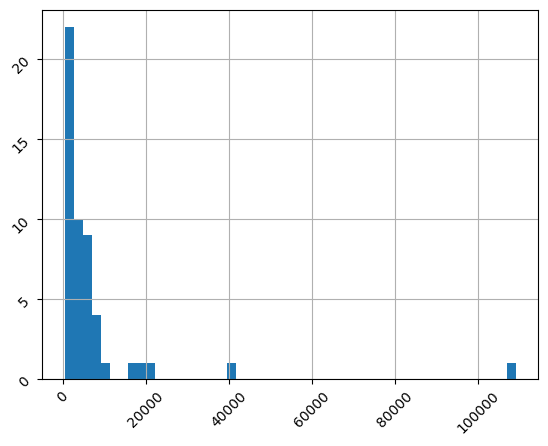

In [44]:
df_home['individuals'].hist(bins=50, xrot=45,yrot=45)

<Axes: >

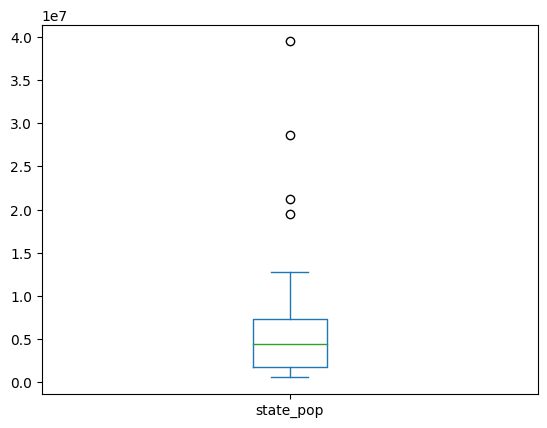

In [45]:
 df_home['state_pop'].plot(kind='box')

<Axes: xlabel='region'>

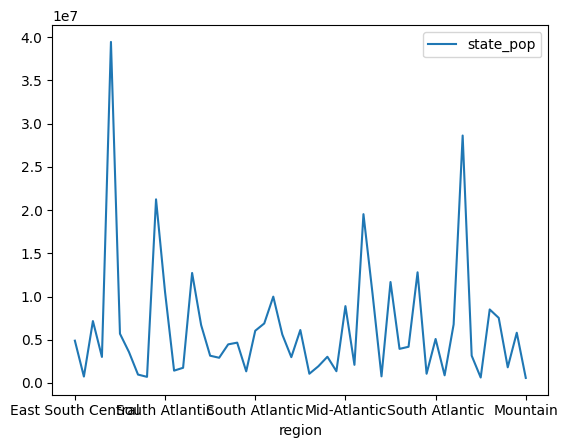

In [48]:
df_home.plot(x='region',y='state_pop',kind='line')

# **dataset**
https://www.kaggle.com/datasets/ashydv/housing-dataset

In [50]:
df_house = pd.read_csv("/content/Housing.csv")

In [51]:
df_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: >

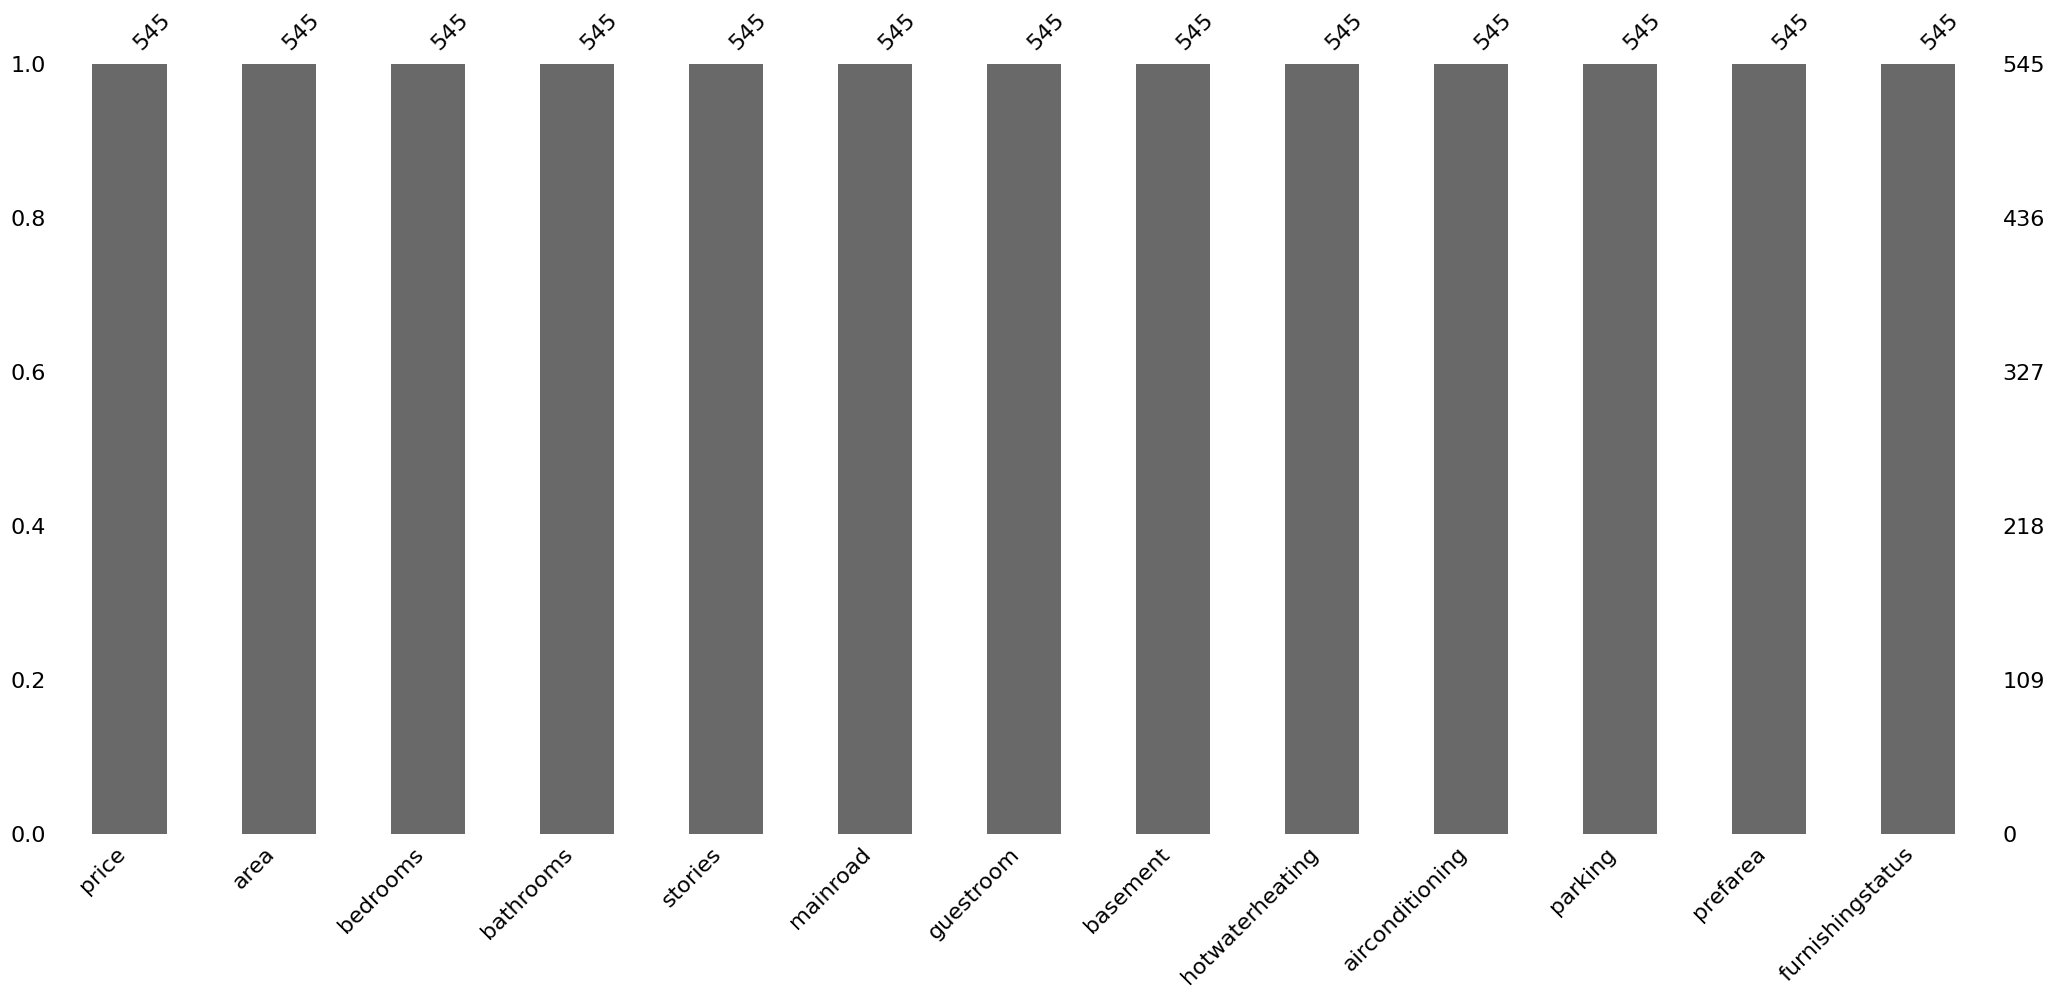

In [52]:
msno.bar(df_house)

In [53]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<Axes: >

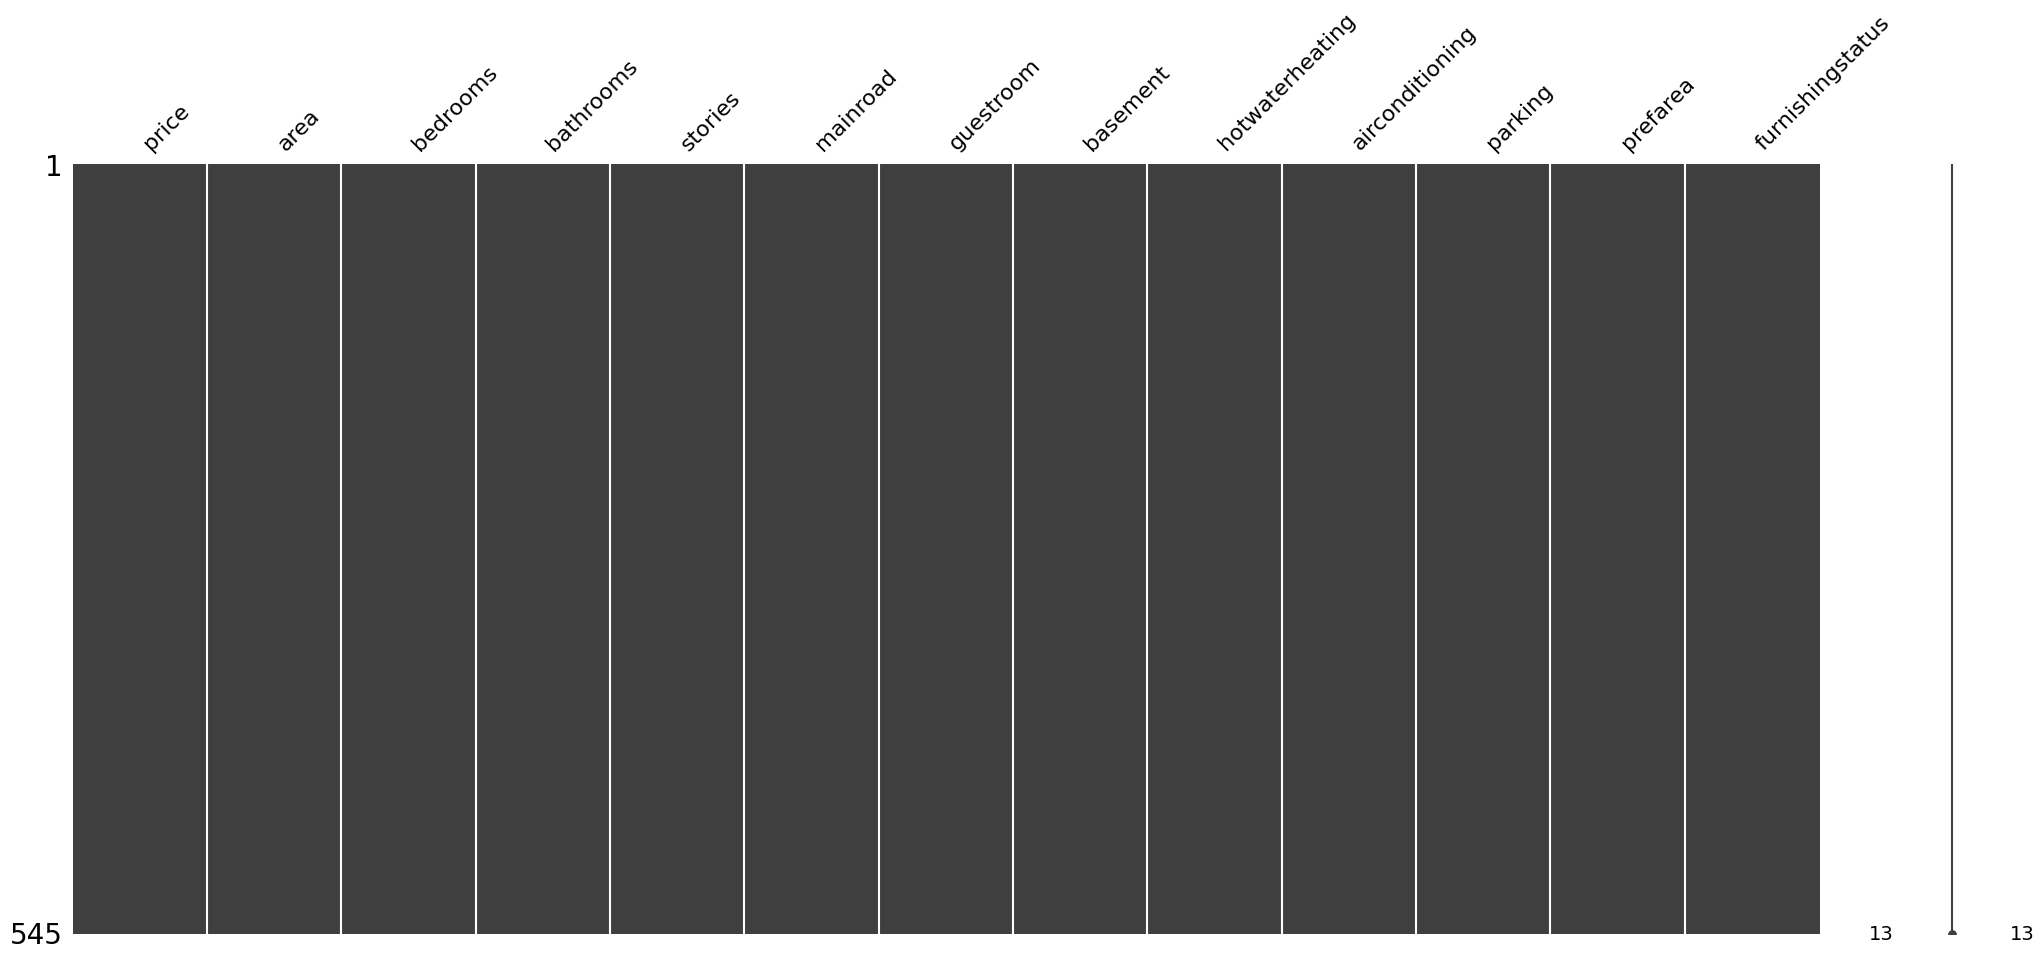

In [54]:
msno.matrix(df_house)

In [55]:
df_house.isna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
df_house.isna().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [57]:
df_house.isna().any().sum()

0